In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('/content/alzheimers_disease_data_original.csv')

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
#Dropping this col as it won't have much effect on model
df = df.drop(columns=['DoctorInCharge'])

In [ ]:
# Basic stats for numerical columns
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
nunique = df.nunique()
constant_cols = nunique[nunique == 1].index.tolist()
print(f"Columns with a single unique value (can be dropped): {constant_cols}")

Columns with a single unique value (can be dropped): []


In [ ]:
# List of true numerical (continuous) features
continuous_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
    'FunctionalAssessment', 'ADL'
]

# Check skewness only on continuous columns
skewed_feats = df[continuous_cols].skew().sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 1]

print("Skewed continuous features (skew > 1):")
print(high_skew)


Skewed continuous features (skew > 1):
Series([], dtype: float64)


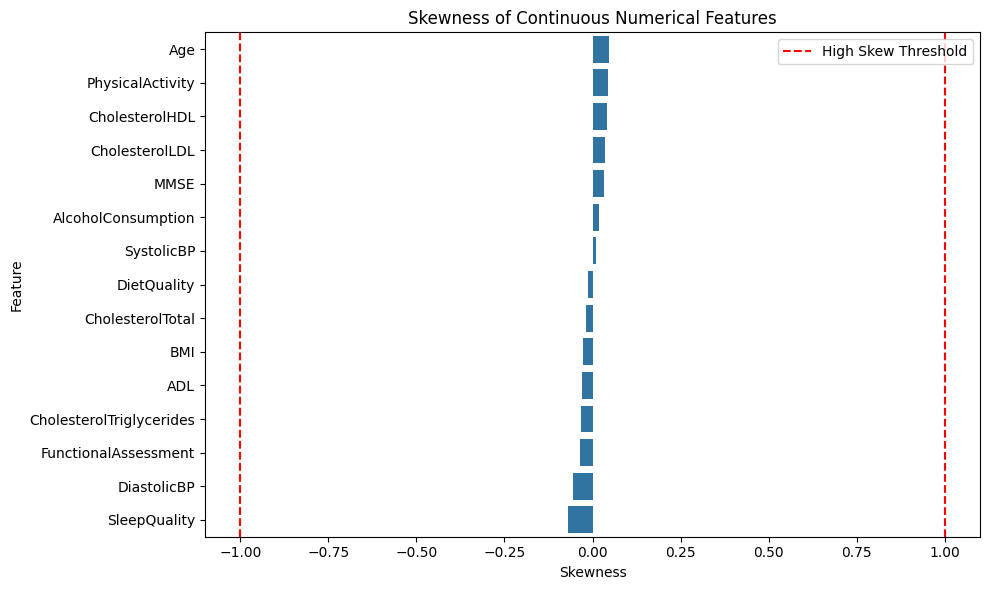

In [ ]:
skewed_feats = df[continuous_cols].skew().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=skewed_feats.values, y=skewed_feats.index)
plt.title("Skewness of Continuous Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Feature")
plt.axvline(1, color='r', linestyle='--', label='High Skew Threshold')
plt.axvline(-1, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Since continuous numerical features aren't highly skewed (i.e., skew < 1), so there's no need to transform/normalize them. Other features are categotrical and have been encoded as 0 or 1, so visualising them was not possible as they would appear skewed.

In [ ]:
# Split into train, cross and test
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

# Save splits to CSV
train_df.to_csv('alz_train.csv', index=False)
val_df.to_csv('alz_validation.csv', index=False)
test_df.to_csv('alz_test.csv', index=False)

print("Files saved successfully: alz_train.csv, alz_validation.csv, alz_test.csv")


Train shape: (1289, 34)
Validation shape: (430, 34)
Test shape: (430, 34)
Files saved successfully: alz_train.csv, alz_validation.csv, alz_test.csv


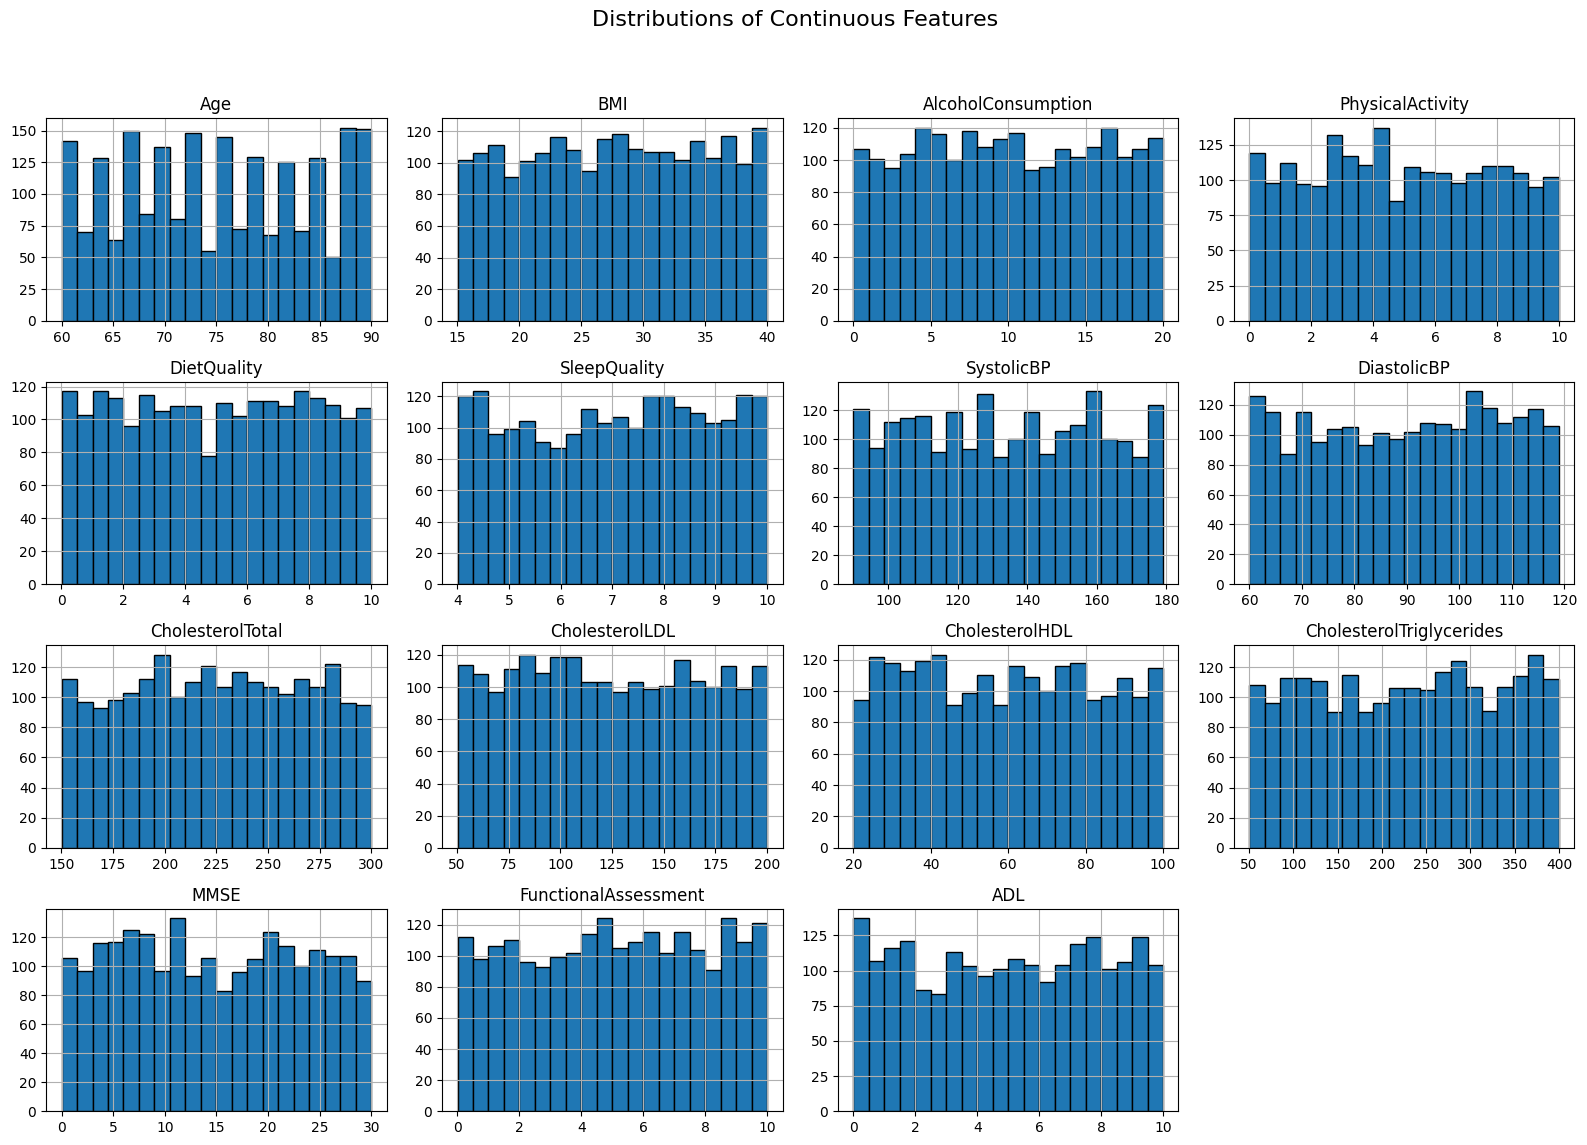

In [ ]:
#step 2: Exploratory Data Analysis (EDA) & Initial Insights

# Plot histograms for continuous variables to ive an idea of sense of the shape, spread, and potential outliers.
df[continuous_cols].hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle('Distributions of Continuous Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The distributions of continuous features appear relatively even and well-distributed, with no extreme skewness. Variables like Age, BMI, and Blood Pressure show a fairly uniform spread, suggesting a diverse dataset. Cognitive and functional assessments like MMSE, FunctionalAssessment, and ADL are also nicely distributed, which is promising for capturing a range of impairment levels. This balance indicates good potential for model learning without requiring major transformations.

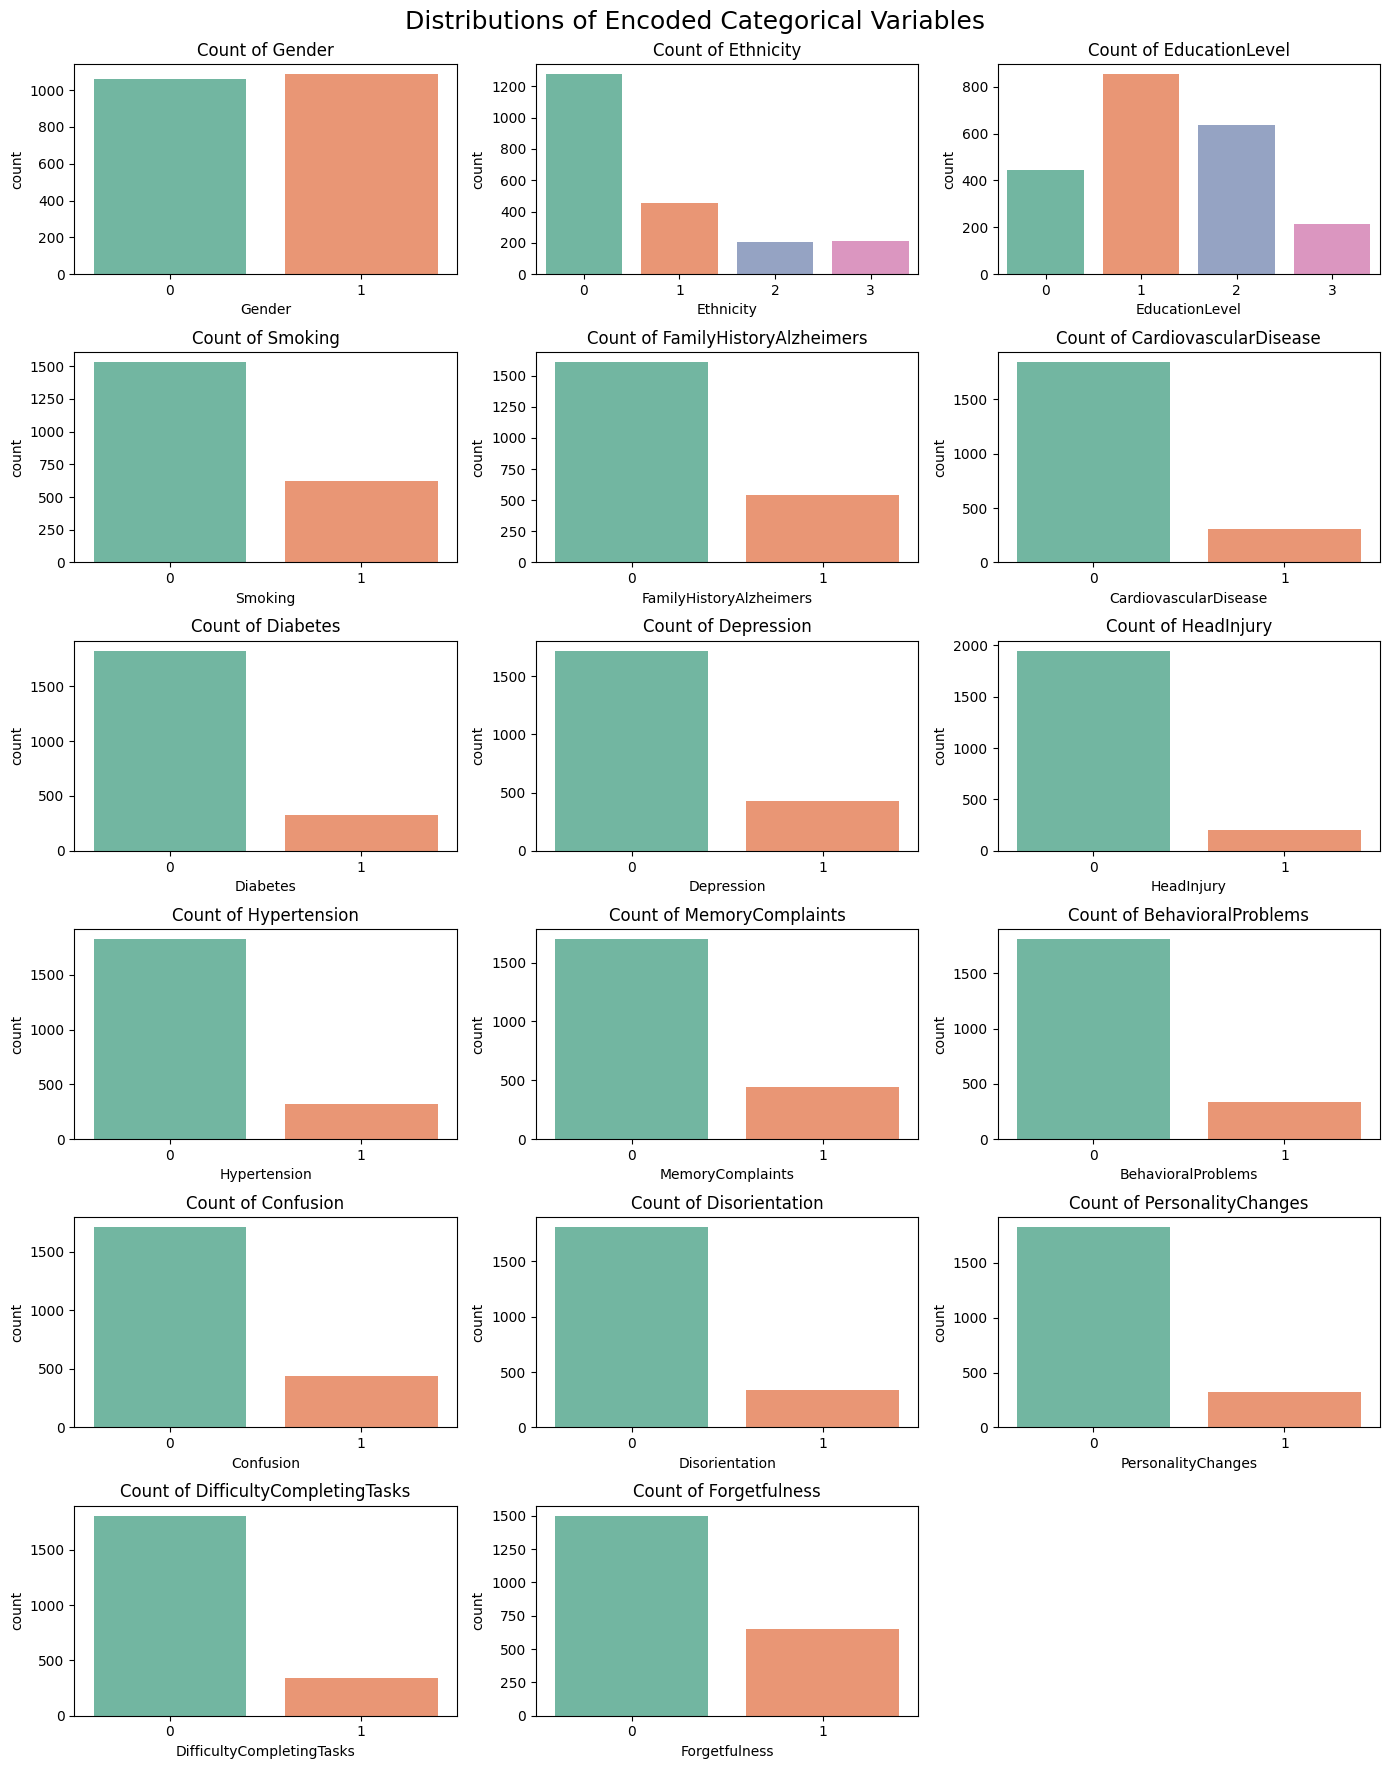

In [ ]:
# Defining encoded categorical columns (excluding diagnosis for now)
categorical_encoded_cols = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]

# Plot barplots for them
plt.figure(figsize=(14, 18))
for i, col in enumerate(categorical_encoded_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f"Count of {col}")
    plt.tight_layout()

plt.suptitle('Distributions of Encoded Categorical Variables', fontsize=18)
plt.subplots_adjust(top=0.95)
plt.show()


The categorical variables exhibit class imbalance in several cases. For instance:

Conditions like Hypertension, CardiovascularDisease, HeadInjury, and Depression show a strong majority of 0 (absence), which could affect model sensitivity if not addressed.

Some variables like Smoking, FamilyHistoryAlzheimers, and Forgetfulness are more balanced, making them more immediately useful for prediction.

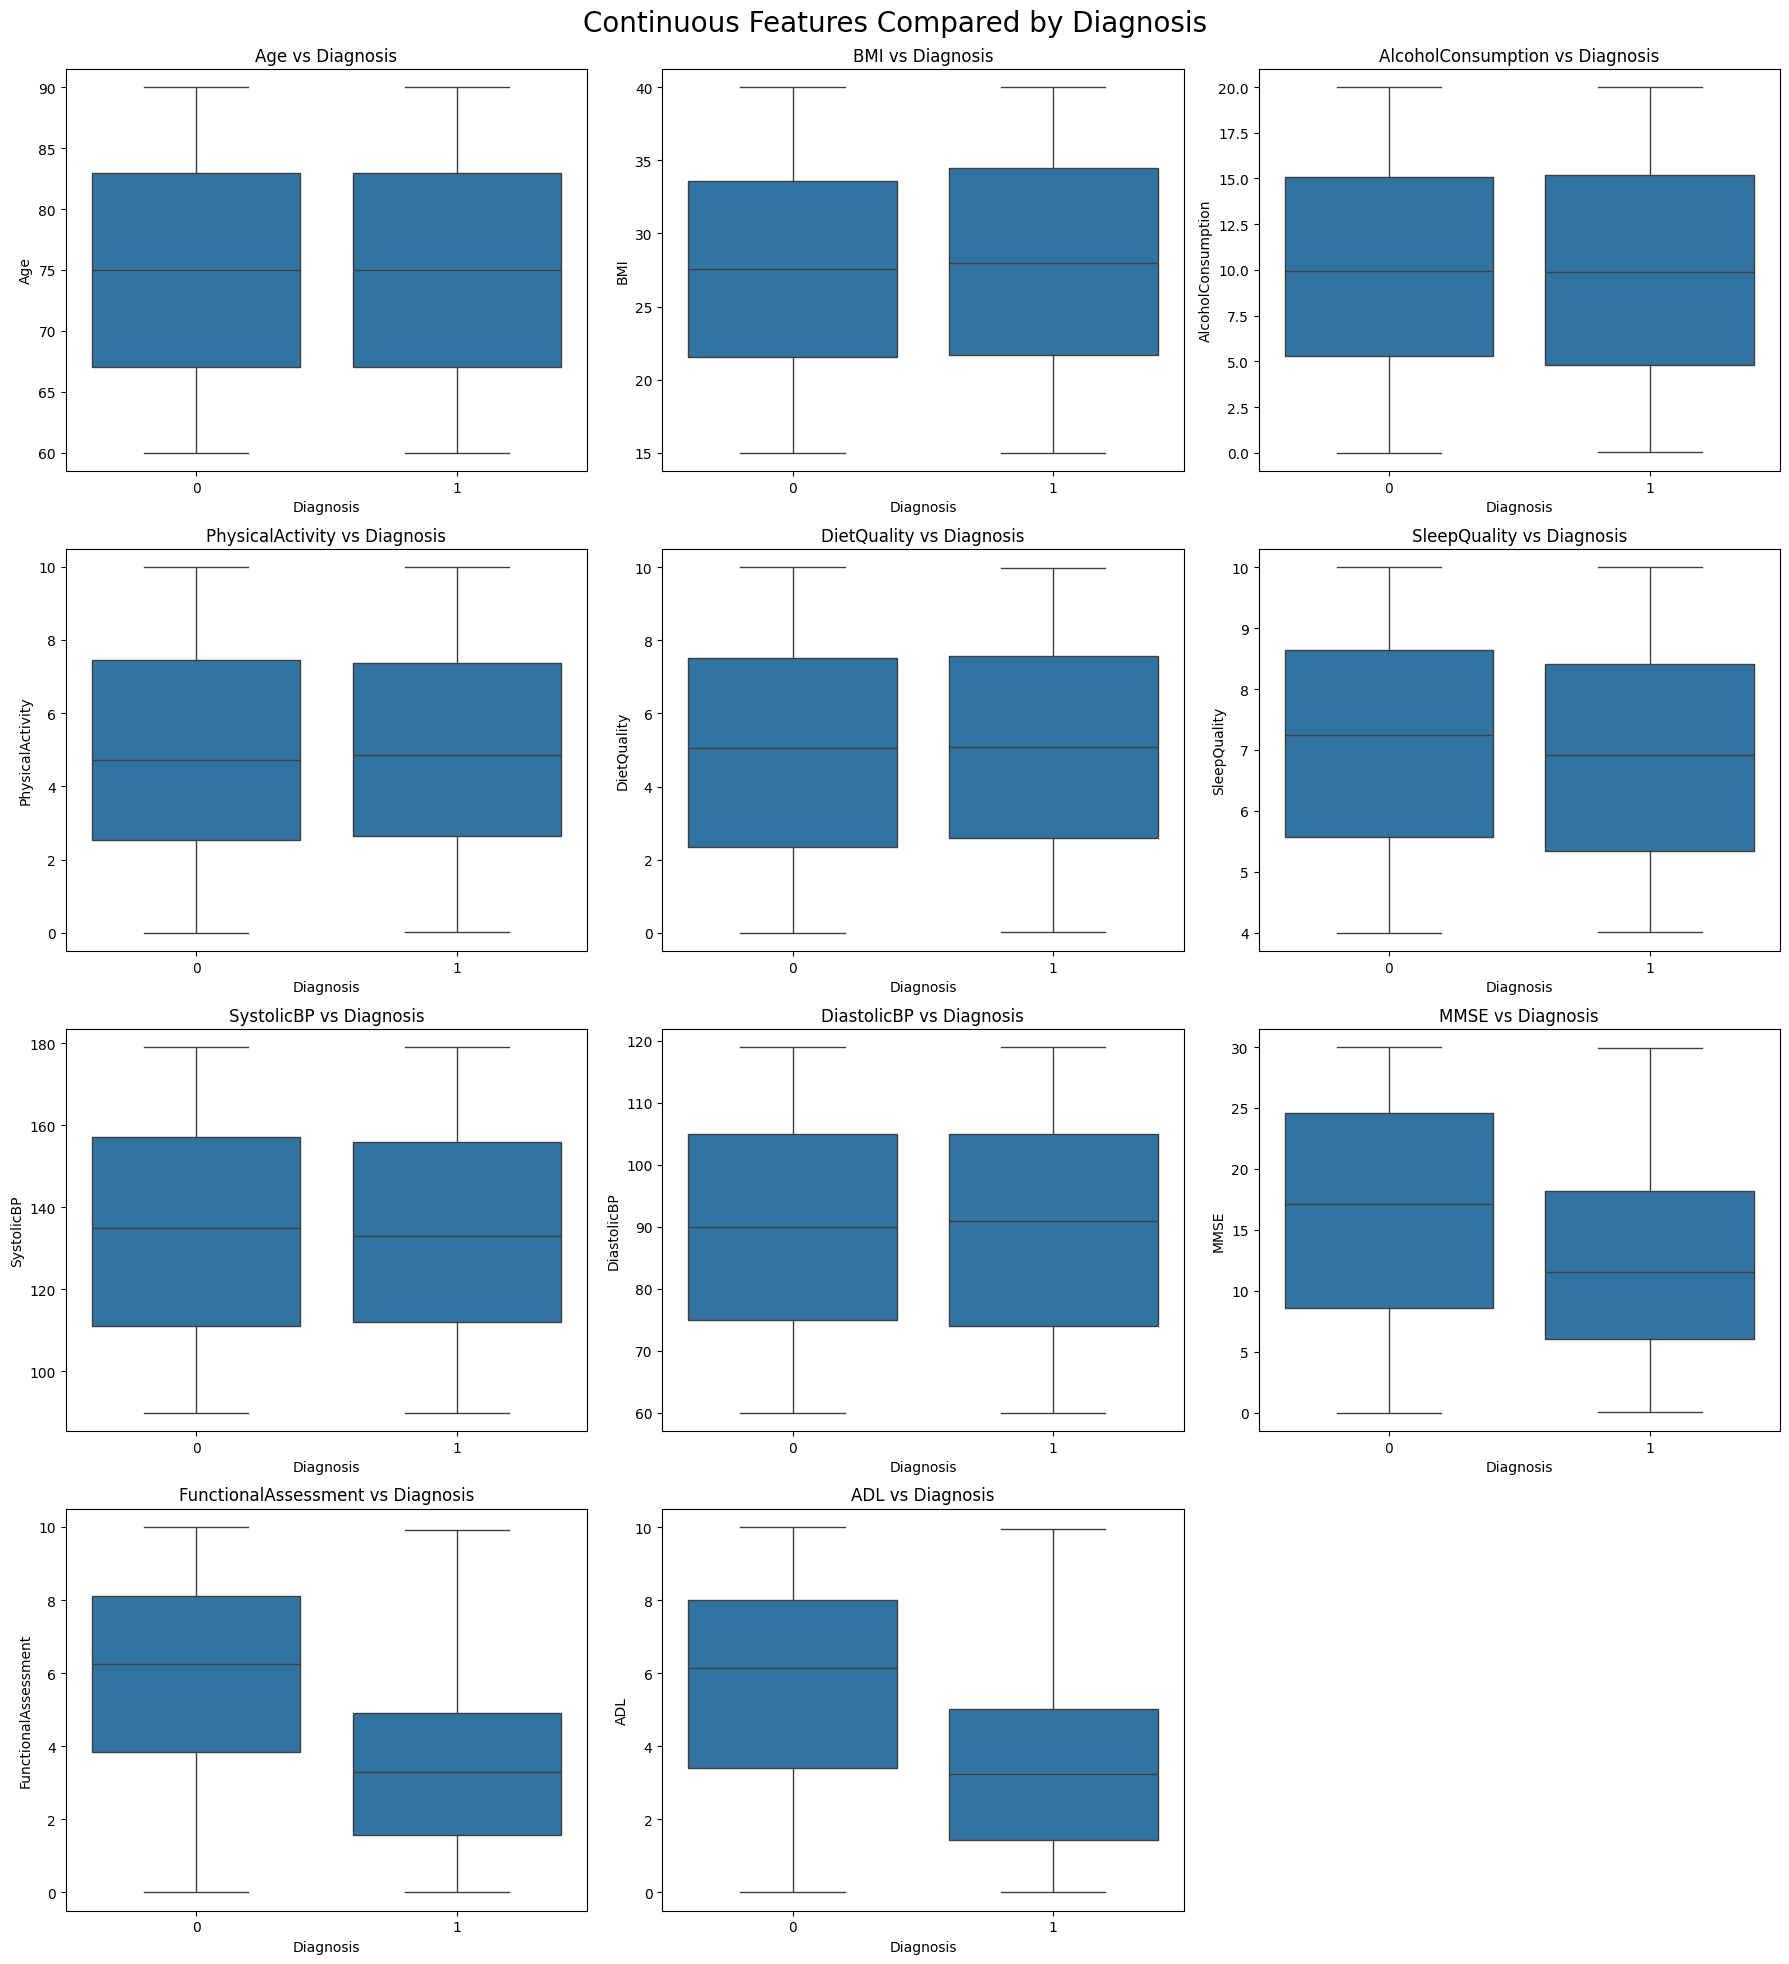

In [ ]:
# Continuous features to analyze against Diagnosis
features_to_compare = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'MMSE',
    'FunctionalAssessment', 'ADL'
]

plt.figure(figsize=(18, 20))
for i, col in enumerate(features_to_compare):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} vs Diagnosis')
    plt.tight_layout()

plt.suptitle('Continuous Features Compared by Diagnosis', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()




1.   MMSE, FunctionalAssessment, and ADL stand out as clearly lower in the diagnosed group (Diagnosis = 1). This aligns with clinical expectations — cognitive and functional scores decline in Alzheimer’s patients.These are likely to be highly predictive features in the model.

2.   Other continuous features such as Age, BMI, AlcoholConsumption, and PhysicalActivity show no sharp distinction between groups. There may be subtle differences, but they’re not visually pronounced. Still, they could play a role when combined with other features or interactions.

3. Blood pressure (Systolic/Diastolic), DietQuality, and SleepQuality also exhibit only minor variation — may be weak individual predictors but useful in ensemble models.



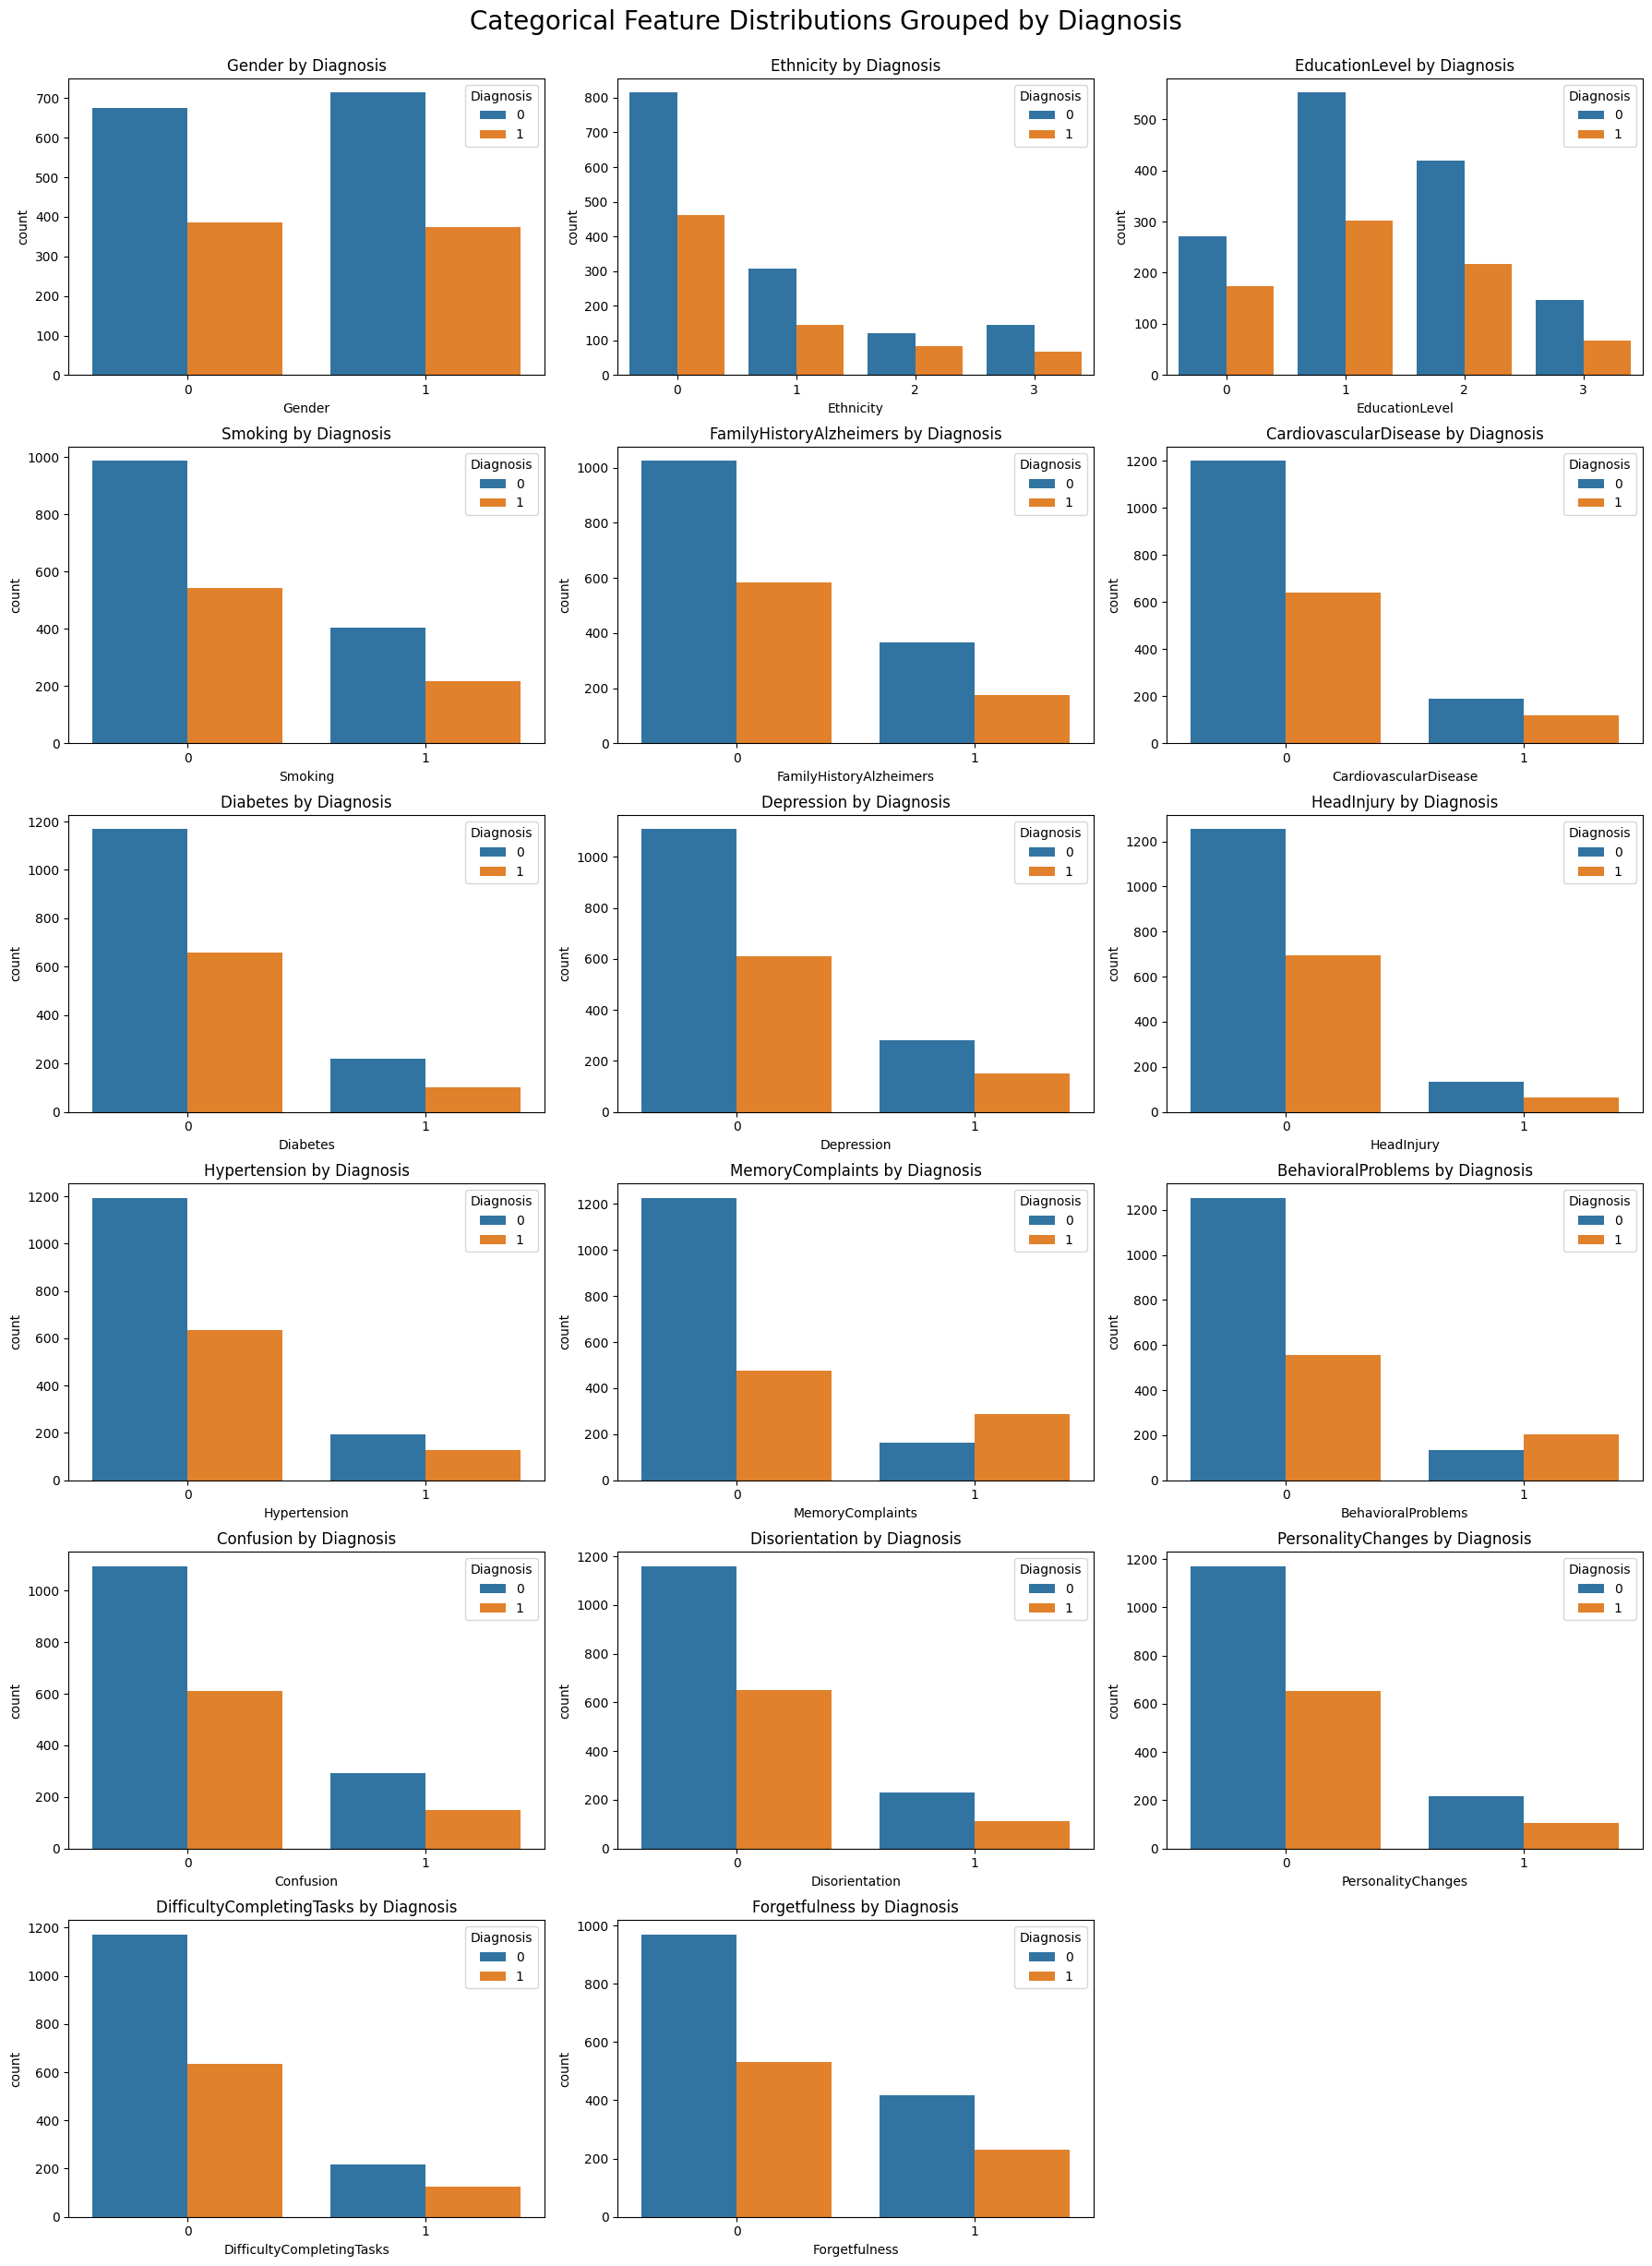

In [ ]:
# categorical features vs Diagnosis
cat_features = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'
]

plt.figure(figsize=(18, 25))
for i, col in enumerate(cat_features):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=col, hue='Diagnosis', data=df)
    plt.title(f'{col} by Diagnosis')
    plt.legend(title='Diagnosis')
    plt.tight_layout()

plt.suptitle('Categorical Feature Distributions Grouped by Diagnosis', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()




1.   Strong visual trends where diagnosed individuals have higher proportions of the following conditions:
  *   FamilyHistoryAlzheimers, Depression, HeadInjury, Confusion, Forgetfulness, Disorientation, DifficultyCompletingTasks, and PersonalityChanges.
  *   These features directly reflect either risk factors or early symptoms, making them important for early detection.
2.  CardiovascularDisease, Diabetes, and Hypertension also show more cases among diagnosed individuals. This supports the known link between chronic physical conditions and cognitive decline.These may act as indirect predictors.
3. Features like Gender, Ethnicity, and EducationLevel do not show strong class separation.Their predictive power might be limited unless used in combination with other features.


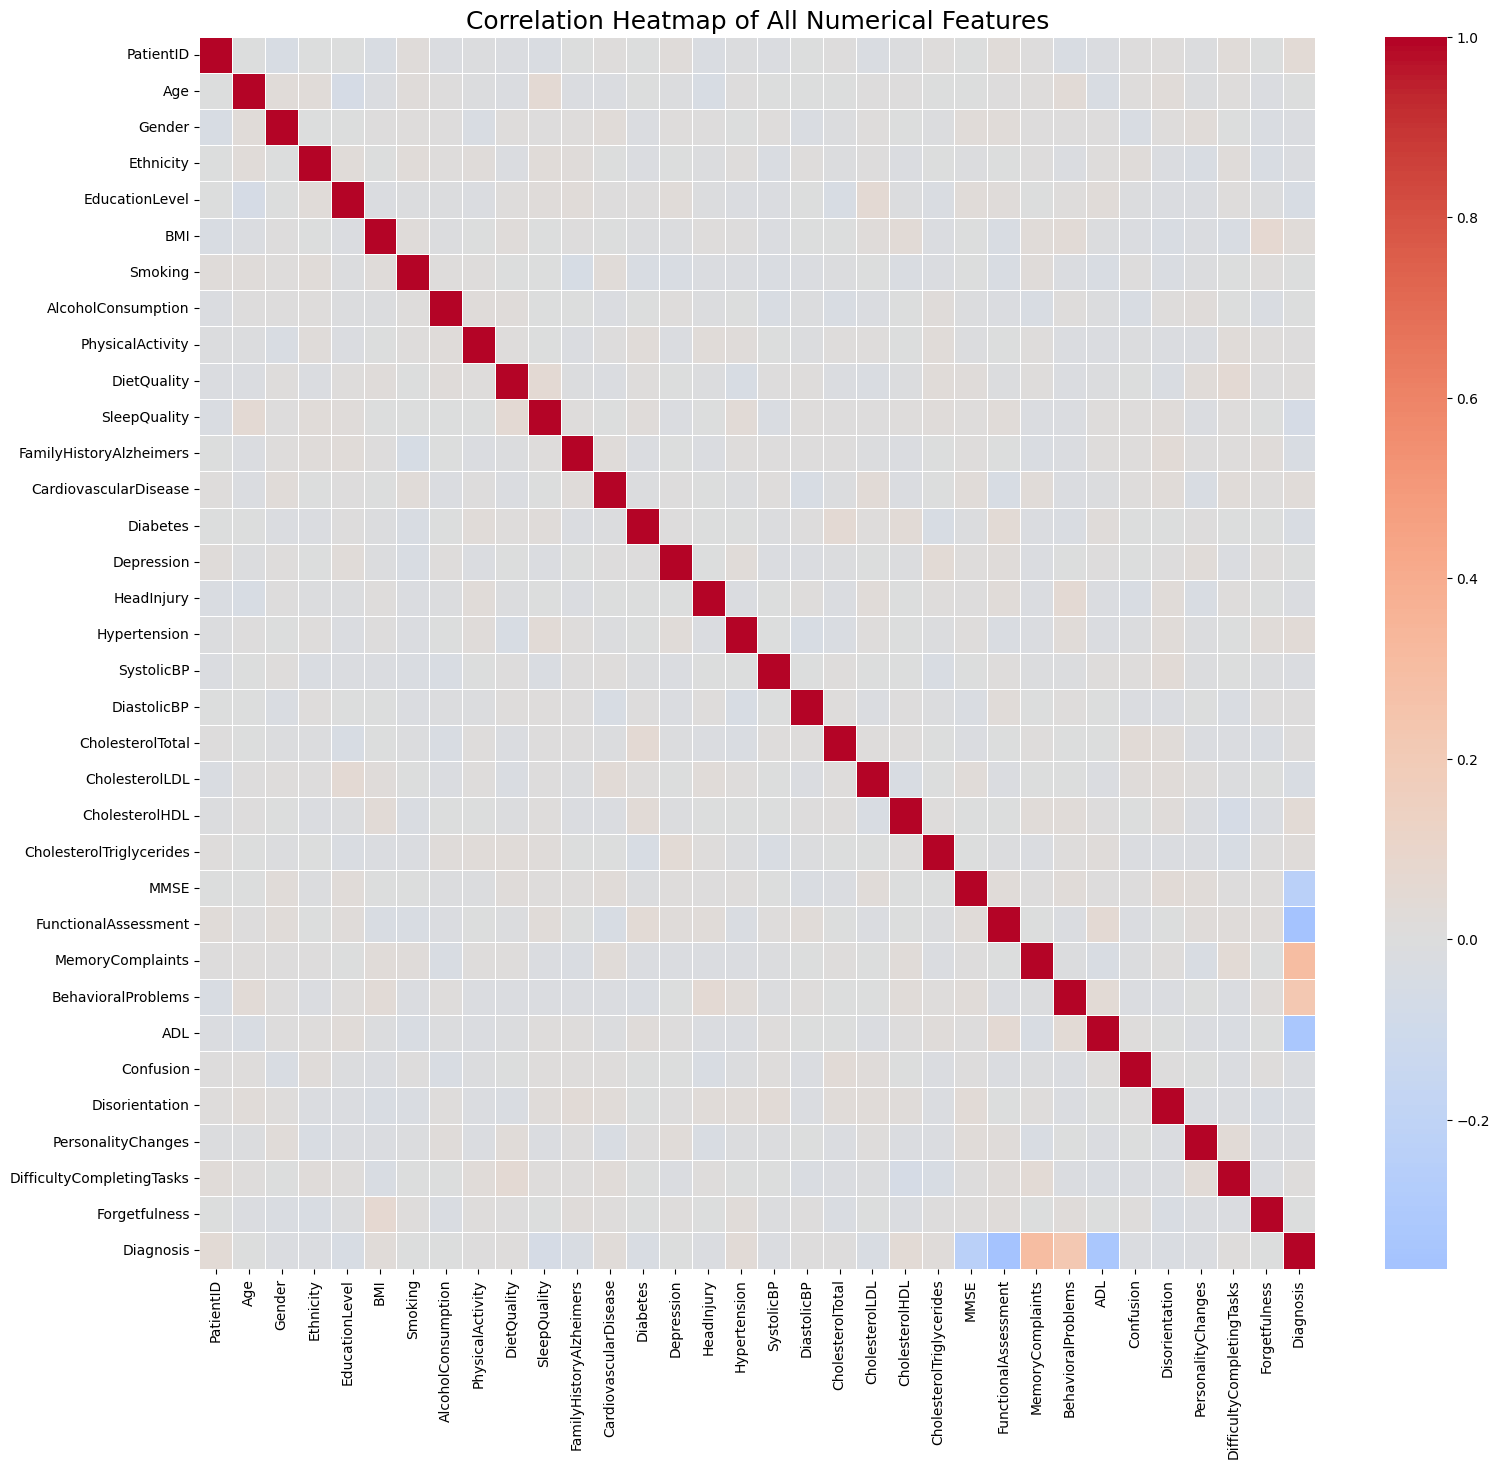

In [ ]:
# Compute correlation matrix for all numerical columns
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of All Numerical Features", fontsize=18)
plt.show()


The correlation heatmap shows generally low correlations among most features, indicating that the dataset does not suffer from severe multicollinearity. This is beneficial for model stability, particularly for linear models like logistic regression.

In [ ]:
# Correlation with Diagnosis variable
diagnosis_corr = corr_matrix["Diagnosis"].sort_values(ascending=False)

print("Top features positively correlated with Diagnosis:\n")
print(diagnosis_corr.head(10))

print("\nTop features negatively correlated with Diagnosis:\n")
print(diagnosis_corr.tail(10))


Top features positively correlated with Diagnosis:

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
PatientID                    0.041019
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
Name: Diagnosis, dtype: float64

Top features negatively correlated with Diagnosis:

HeadInjury                -0.021411
Disorientation            -0.024648
Diabetes                  -0.031508
CholesterolLDL            -0.031976
FamilyHistoryAlzheimers   -0.032900
EducationLevel            -0.043966
SleepQuality              -0.056548
MMSE                      -0.237126
ADL                       -0.332346
FunctionalAssessment      -0.364898
Name: Diagnosis, dtype: float64




1.   Positively correlated features of value include:
  * MemoryComplaints (+0.31) and BehavioralProblems (+0.22), both of which logically increase with Alzheimer’s risk and suggest cognitive or behavioral changes are associated with diagnosis.
  * A few other features like Hypertension, CardiovascularDisease, and BMI show very weak positive correlations, likely reflecting indirect health risk factors.
2.   Negatively correlated features include:
  *   FunctionalAssessment (–0.36), ADL (–0.33), and MMSE (–0.24), all of which are scoring systems where lower scores reflect greater impairment. Their negative correlation with diagnosis correctly indicates that as functional or cognitive ability declines, the likelihood of an Alzheimer’s diagnosis increases.
  *   These features are likely to be strong predictors in downstream models.
3. Features with low or negligible correlation (like PatientID or CholesterolHDL) appear in the list due to numerical encoding but do not carry meaningful predictive value and can be excluded from modeling.




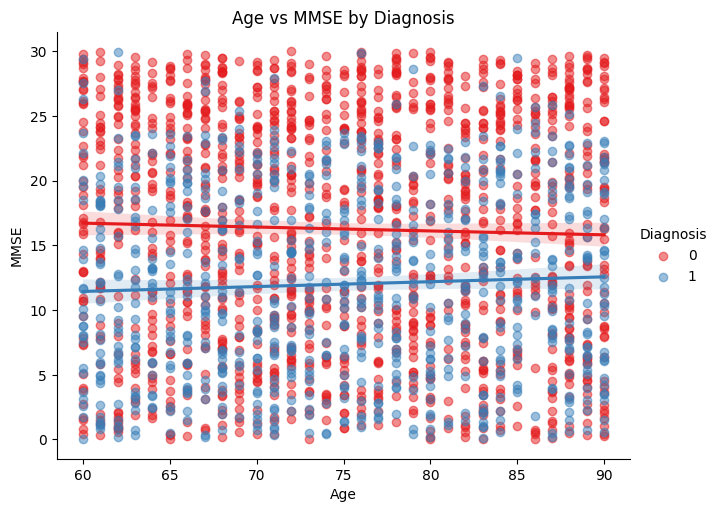

In [ ]:
sns.lmplot(x='Age', y='MMSE', hue='Diagnosis', data=df, aspect=1.3, palette='Set1', scatter_kws={'alpha':0.5})
plt.title('Age vs MMSE by Diagnosis')
plt.show()


Diagnosed individuals (blue) tend to have lower MMSE scores across all ages. There's a slight downward trend with age, suggesting cognitive decline is mildly age-associated but more strongly related to diagnosis. MMSE is clearly a strong feature regardless of age.

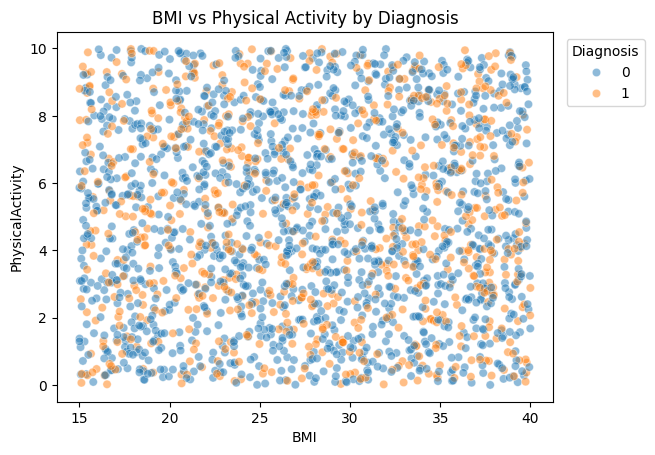

In [ ]:
sns.scatterplot(x='BMI', y='PhysicalActivity', hue='Diagnosis', data=df, alpha=0.5)
plt.legend(title='Diagnosis', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.title('BMI vs Physical Activity by Diagnosis')
plt.show()


There’s no clear separation between diagnosed and non-diagnosed groups.This suggests that while BMI and activity levels vary, they don't interact strongly to indicate Alzheimer’s risk alone.
Useful as supplementary features, but not strong predictors by themselves.

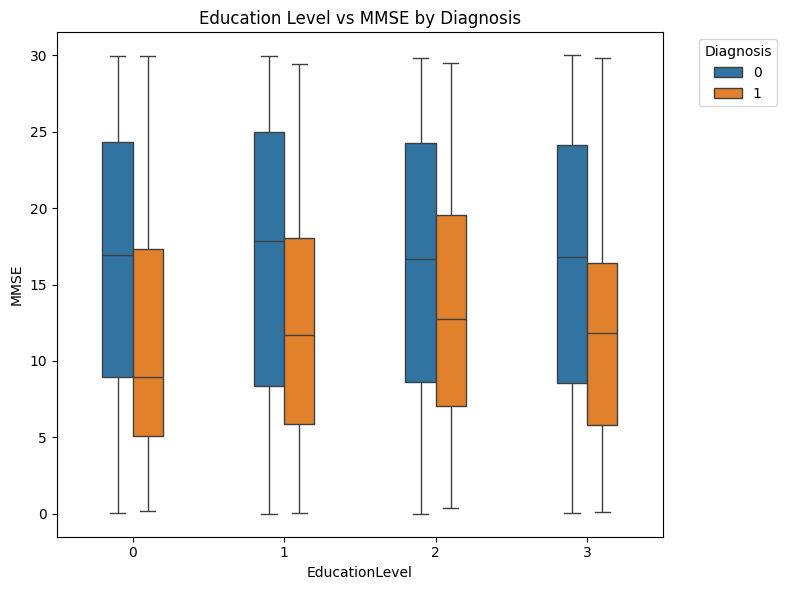

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EducationLevel', y='MMSE',hue='Diagnosis', data=df,width=0.4, dodge=True, linewidth=1 )
plt.title('Education Level vs MMSE by Diagnosis')
plt.legend(title='Diagnosis', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.tight_layout()
plt.show()


Across all education levels, diagnosed individuals (orange) show lower MMSE scores. However, those with higher education seem to retain slightly higher MMSE scores, hinting at a cognitive reserve effect (education may buffer decline).Education may moderate severity rather than prevent diagnosis.

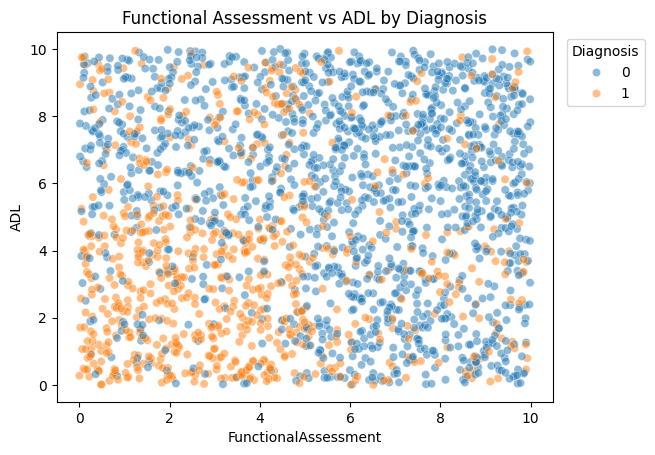

In [ ]:
sns.scatterplot(x='FunctionalAssessment', y='ADL', hue='Diagnosis', data=df, alpha=0.5)
plt.legend(title='Diagnosis', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.title('Functional Assessment vs ADL by Diagnosis')
plt.show()


Diagnosed individuals cluster toward lower scores on both axes — reflecting reduced independence and functioning. Strong class separation is visible, especially at the lower left (low function + low ADL = high diagnosis risk). These two features together could potentially be powerful predictors.


Random Forest Validation
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       254
           1       0.97      0.78      0.87       176

    accuracy                           0.90       430
   macro avg       0.92      0.88      0.90       430
weighted avg       0.91      0.90      0.90       430

[[250   4]
 [ 38 138]]
Validation Accuracy: 0.9023255813953488


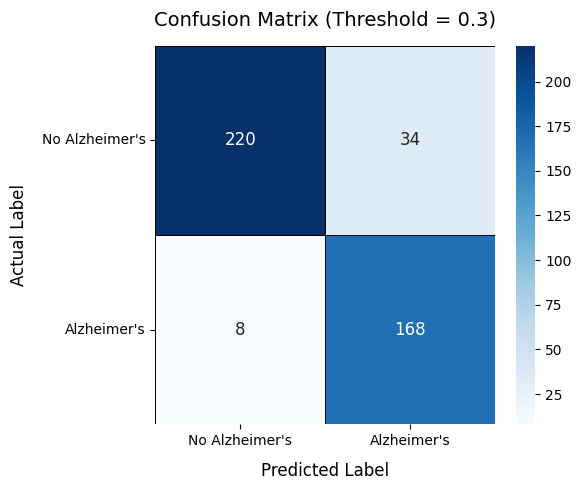

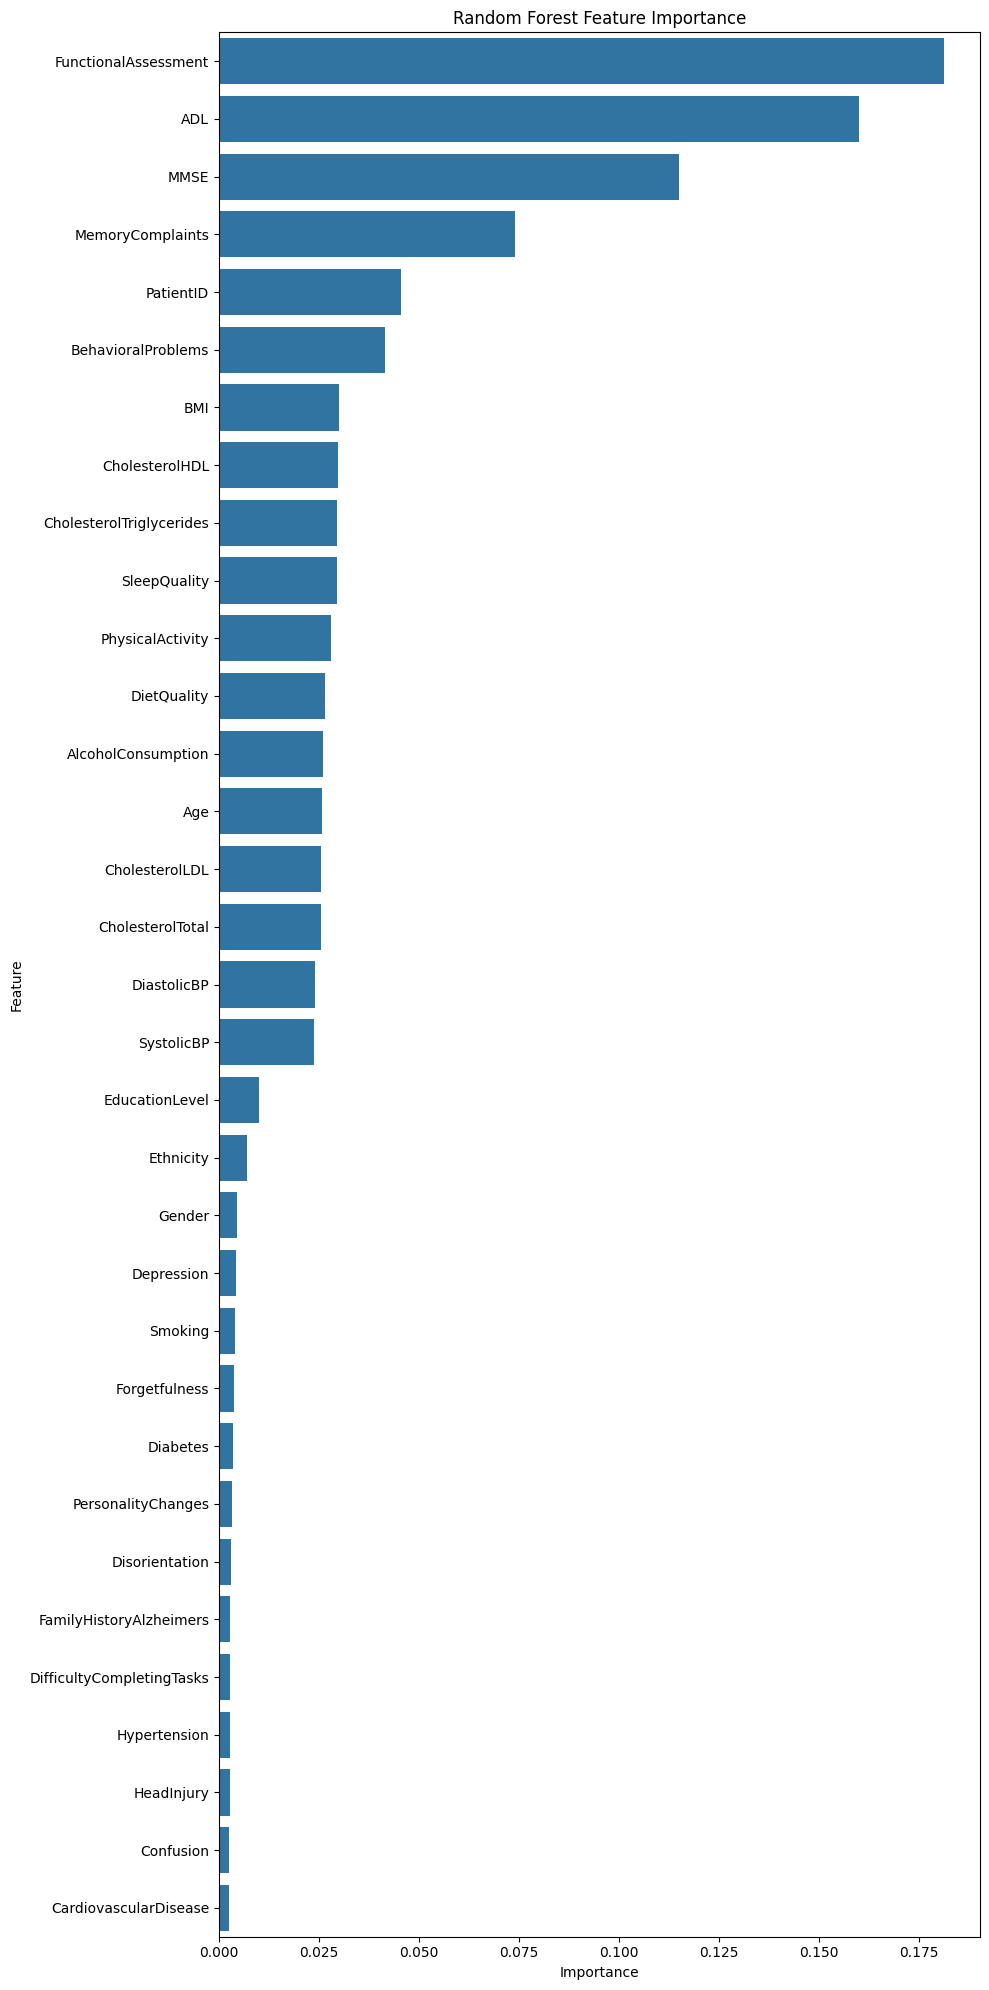

In [90]:
df = pd.read_csv('/content/alzheimers_disease_data_original.csv')

categorical_encoded_cols = [
  'MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints',
  'BehavioralProblems', 'Forgetfulness', 'Confusion', 'Disorientation', 'DifficultyCompletingTasks',
  'PersonalityChanges', 'FamilyHistoryAlzheimers', 'Depression', 'HeadInjury', 'Hypertension',
  'CardiovascularDisease', 'Diabetes'
]

df = pd.get_dummies(df, columns=categorical_encoded_cols, drop_first=True)

if 'PatientID' in df.columns:
    df = df.drop('PatientID', axis=1)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

if 'PatientID' in train_df.columns:
    X_train_no_id = train_df.drop(['Diagnosis', 'PatientID'], axis=1, errors='ignore')
else:
    X_train_no_id = train_df.drop('Diagnosis', axis=1, errors='ignore')

if 'PatientID' in val_df.columns:
    X_val_no_id = val_df.drop(['Diagnosis', 'PatientID'], axis=1, errors='ignore')
else:
    X_val_no_id = val_df.drop('Diagnosis', axis=1, errors='ignore')

X_train = train_df.drop('Diagnosis', axis=1)
y_train = train_df['Diagnosis']
X_val = val_df.drop('Diagnosis', axis=1)
y_val = val_df['Diagnosis']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_val = rf_model.predict(X_val)
print("\nRandom Forest Validation")
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

threshold = 0.3

y_pred = np.where(y_pred_proba >= threshold, 1, 0)

cm = confusion_matrix(y_val, y_pred)

class_names = ['No Alzheimer\'s', 'Alzheimer\'s']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={'size': 12}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label', fontsize=12, labelpad=10)
plt.ylabel('Actual Label', fontsize=12, labelpad=10)
plt.title(f'Confusion Matrix (Threshold = {threshold})', fontsize=14, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 20))  # Adjust size as needed
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


